<a href="https://colab.research.google.com/github/Jasminewakini/Wk7_MORINGA-CORE/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2021_12_Jasmine_Wakini_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Hass Consulting Company

## 1. Defining the Question

### a) Specifying the Question


> What are the factors that affect housing prices?


### b) Defining the Metric for Success

> The research will be viewed successful if the 3 models (ie Lasso, Ridge and Elastic Net Regression) could have averagely the same MSE score

### c) Understanding the context 

> As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. 

> You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. 

> Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### d) Recording the Experimental Design

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.

5. Perform univariate, bivariate and multivariate analysis recording your observations.

6. Performing regression analysis.

  a) Incorporate categorical independent variables into your models.

  b) Check for multicollinearity

7. Provide a recommendation based on your analysis.
 
  a) Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

8. Challenge your solution by providing insights on how you can make improvements in model improvement.

### e) Data Relevance

The data relevance will be discussed after the analysis is complete.

## 2. Reading the Data

In [86]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Loading the Dataset
# Dataset url = http://bit.ly/EcommerceDataset 
#

housing = pd.read_csv("Independent Project Week 7 - house_data.csv")
housing


id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 columns]

## 3. Checking the Data

In [88]:
# Determining the no. of records in our dataset
#
housing.shape

(21613, 20)

In [89]:
# Previewing the top of our dataset
#
housing.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [90]:
# Previewing the bottom of our dataset
# 
housing.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [93]:
# Checking whether each column has an appropriate datatype
#
housing.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [94]:
# Checking for descriptive info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [98]:
# Showing the statistical descriptions
housing.describe()

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.161300e+04  21613.000000  ...   21613.000000   21613.000000
mean   5.401822e+05      3.370842  ...    1986.552492   12768.455652
std    3.673622e+05      0.930062  ...     685.391304   27304.179631
min    7.500000e+04      0.000000  ...     399.000000     651.000000
25%    3.219500e+05      3.000000  ...    1490.000000    5100.000000
50%    4.500000e+05      3.000000  ...    1840.000000    7620.000000
75%    6.450000e+05      4.000000  ...    2360.000000   10083.000000
max    7.700000e+06     33.000000  ...    6210.000000  871200.000000

[8 rows x 17 columns]

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.

## 5. Tidying the Dataset

In [95]:
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [96]:
# Dropping columns we dont need
housing = housing.drop(['id','lat', 'long'], axis = 1)
housing

price  bedrooms  bathrooms  ...  zipcode  sqft_living15  sqft_lot15
0      221900.0         3       1.00  ...    98178           1340        5650
1      538000.0         3       2.25  ...    98125           1690        7639
2      180000.0         2       1.00  ...    98028           2720        8062
3      604000.0         4       3.00  ...    98136           1360        5000
4      510000.0         3       2.00  ...    98074           1800        7503
...         ...       ...        ...  ...      ...            ...         ...
21608  360000.0         3       2.50  ...    98103           1530        1509
21609  400000.0         4       2.50  ...    98146           1830        7200
21610  402101.0         2       0.75  ...    98144           1020        2007
21611  400000.0         3       2.50  ...    98027           1410        1287
21612  325000.0         2       0.75  ...    98144           1020        1357

[21613 rows x 17 columns]

In [97]:
# Checking for the shape to confirm dropping of columns
housing.shape

(21613, 17)

In [99]:
# Identify duplicate data and drop it

housing = housing.drop_duplicates()

# check the shape of the data to see if there were any duplicates
housing.shape

(21607, 17)

> The records changed from 21613 to 21607 indicating that we dropped 8 duplicate records

In [100]:
housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

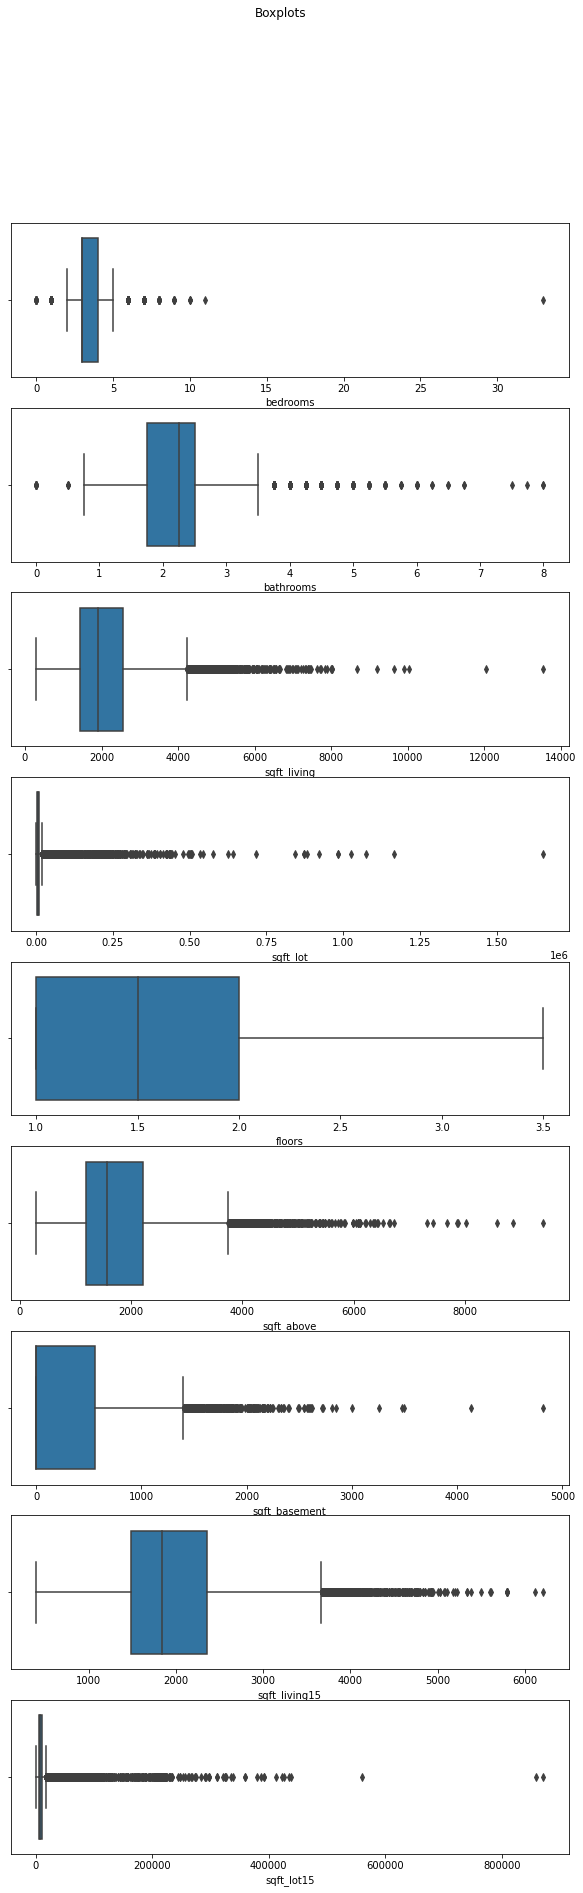

In [101]:
# Checking for outliers 
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9)) = plt.subplots(9,1, figsize=(10,30))
fig.suptitle('Boxplots')
sns.boxplot(housing['bedrooms'], ax=ax1)
sns.boxplot(housing['bathrooms'], ax=ax2)
sns.boxplot(housing['sqft_living'], ax=ax3)
sns.boxplot(housing['sqft_lot'], ax=ax4)
sns.boxplot(housing['floors'], ax=ax5)
sns.boxplot(housing['sqft_above'], ax=ax6)
sns.boxplot(housing['sqft_basement'], ax=ax7)
sns.boxplot(housing['sqft_living15'], ax=ax8)
sns.boxplot(housing['sqft_lot15'], ax=ax9)
plt.show()

> Outliers are present in all the selected columns except floors 

> We keep outliers for specific columns because most of the detected outliers are non-error outliers and rightfully belong to the population of interest.

In [102]:
# Removing outliers in particular columns
def remove_Outlier(Df,col_name):
  q1 = Df[col_name].quantile(0.25)
  q3 = Df[col_name].quantile(0.75)
  
  #Interquartile range
  iqr = q3-q1 
  lower_bound  = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  df_out = Df.loc[(Df[col_name] > lower_bound) & (Df[col_name] < upper_bound)]
  df = df_out.copy()
  return df

In [103]:
# Identifying the particular columns for removing outliers
housing = remove_Outlier(housing,'bedrooms')
housing = remove_Outlier(housing,'sqft_living')
housing = remove_Outlier(housing,'sqft_lot')
housing = remove_Outlier(housing,'sqft_above')
housing = remove_Outlier(housing,'sqft_basement')
housing = remove_Outlier(housing,'sqft_lot15')

In [104]:
# Confirming the shape after to check if outliers were dropped
housing.shape

(17074, 17)

> The records changed from 21607 to 17074, indicating that we dropped 4533 outliers

In [105]:
# Checking for Anomalies
#
def check_Anomalies(Df,col_name):
  q1 = Df[col_name].quantile(0.25)
  q3 = Df[col_name].quantile(0.75)
  
  #Interquartile range points
  iqr_points = q3-q1 
  return iqr_points

# Identifying the particular columns for removing outliers
iqr_points_bed = check_Anomalies(housing,'bedrooms')
iqr_points_bath = check_Anomalies(housing,'bathrooms')
iqr_points_liv = check_Anomalies(housing,'sqft_living')
iqr_points_lot = check_Anomalies(housing,'sqft_lot')
iqr_points_flo = check_Anomalies(housing,'floors')
iqr_points_ab = check_Anomalies(housing,'sqft_above')
iqr_points_bas = check_Anomalies(housing,'sqft_basement')
iqr_points_liv15 = check_Anomalies(housing,'sqft_living15')
iqr_points_lot15 = check_Anomalies(housing,'sqft_lot15')

In [106]:
# Printing the anomalies
print('Bedroom Anomalies ', iqr_points_bed)
print('Bathroom Anomalies ', iqr_points_bath)
print('Sqft Living ', iqr_points_liv)
print('Sqft Lot ', iqr_points_lot)
print('Floor ', iqr_points_flo)
print('Sqft Above ', iqr_points_ab)
print('Sqft Basement ', iqr_points_bas)
print('Sqft Living15 ', iqr_points_liv15)
print('Sqft Lot15 ', iqr_points_lot15)

Bedroom Anomalies  1.0
Bathroom Anomalies  1.0
Sqft Living  930.0
Sqft Lot  4201.5
Floor  1.0
Sqft Above  830.0
Sqft Basement  500.0
Sqft Living15  720.0
Sqft Lot15  3850.0


In [107]:
# Identifying the Missing Data
#
housing.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

> There are no missing values

In [108]:
# confirming the information on our df
#
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17074 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17074 non-null  float64
 1   bedrooms       17074 non-null  int64  
 2   bathrooms      17074 non-null  float64
 3   sqft_living    17074 non-null  int64  
 4   sqft_lot       17074 non-null  int64  
 5   floors         17074 non-null  float64
 6   waterfront     17074 non-null  int64  
 7   view           17074 non-null  int64  
 8   condition      17074 non-null  int64  
 9   grade          17074 non-null  int64  
 10  sqft_above     17074 non-null  int64  
 11  sqft_basement  17074 non-null  int64  
 12  yr_built       17074 non-null  int64  
 13  yr_renovated   17074 non-null  int64  
 14  zipcode        17074 non-null  int64  
 15  sqft_living15  17074 non-null  int64  
 16  sqft_lot15     17074 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.3 MB


> There are no null values and each column is attributed to the correct data type 

## 6. Exploratory Data Analysis

### Univariate Analysis

In [109]:
# Previewing our current df
housing.head()

price  bedrooms  bathrooms  ...  zipcode  sqft_living15  sqft_lot15
0  221900.0         3       1.00  ...    98178           1340        5650
1  538000.0         3       2.25  ...    98125           1690        7639
2  180000.0         2       1.00  ...    98028           2720        8062
3  604000.0         4       3.00  ...    98136           1360        5000
4  510000.0         3       2.00  ...    98074           1800        7503

[5 rows x 17 columns]

In [110]:
# Finding the measures of central tendencies

anomalies_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
for column in anomalies_columns:
  print('\n')
  print(column + ', Mean: '+ str(housing[column].mean()))
  print(column + ', Mode: '+ str(housing[column].mode()))
  print(column + ', Median: '+ str(housing[column].median()))
  print(column + ', Standard deviation: '+ str(housing[column].std()))
  print(column + ', Variance: '+ str(housing[column].var()))
  print(column + ', Skewness: '+ str(housing[column].skew()))
  print(column + ', Kurtosis: '+ str(housing[column].kurt()))



bedrooms, Mean: 3.270762562961228
bedrooms, Mode: 0    3
dtype: int64
bedrooms, Median: 3.0
bedrooms, Standard deviation: 0.7787995315406567
bedrooms, Variance: 0.6065287103279464
bedrooms, Skewness: 0.21511419616995547
bedrooms, Kurtosis: -0.3238722262972038


bathrooms, Mean: 2.0087267189879348
bathrooms, Mode: 0    2.5
dtype: float64
bathrooms, Median: 2.0
bathrooms, Standard deviation: 0.6795808017596324
bathrooms, Variance: 0.46183006612026484
bathrooms, Skewness: 0.06613090325825295
bathrooms, Kurtosis: -0.4724583739939492


sqft_living, Mean: 1860.4945531217056
sqft_living, Mode: 0    1400
dtype: int64
sqft_living, Median: 1780.0
sqft_living, Standard deviation: 651.5480513622606
sqft_living, Variance: 424514.863233959
sqft_living, Skewness: 0.5345332751302894
sqft_living, Kurtosis: -0.14751891198754308


sqft_lot, Mean: 6943.375014642146
sqft_lot, Mode: 0    5000
dtype: int64
sqft_lot, Median: 6978.0
sqft_lot, Standard deviation: 3242.9947739451277
sqft_lot, Variance: 1051701

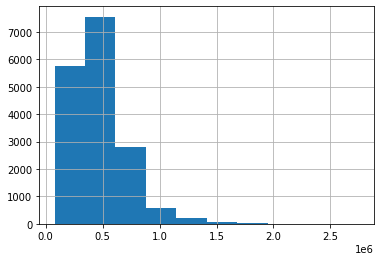

In [111]:
# Plotting the price histogram
#
housing['price'].hist()


> The histogram is right skewed

> Most of the house have a price range of between 400000 (0.4 * 1e6) to 600000 (0.6 * 1e6) 

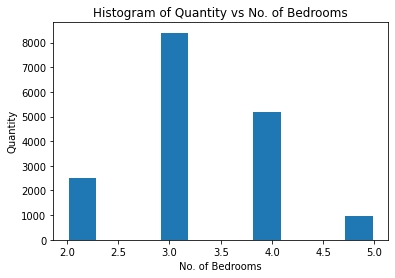

In [112]:
# Creating a histogram from a given dataset using values from the bedroom column
# ---

bedroom_points = housing['bedrooms']

plt.hist(bedroom_points, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('No. of Bedrooms')
plt.ylabel('Quantity')
plt.title('Histogram of Quantity vs No. of Bedrooms')
plt.show()

# I tried with different bin sizes and 10 was the best to make my analysis

> Most of the houses have 3 bedrooms, with 5 being the least.

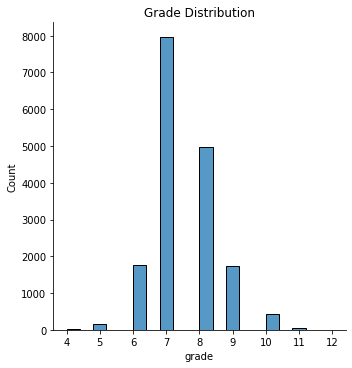

In [113]:
# Plotting the grade distribution

sns.displot(housing['grade'],bins=20)
plt.title("Grade Distribution")
plt.show()

> Most of the houses have been graded 7

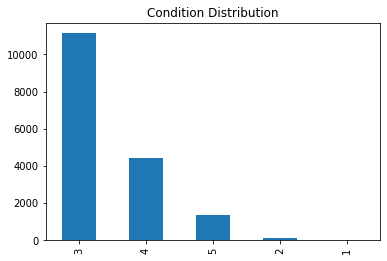

In [114]:
# Identifying which condition was recorded the most

housing['condition'].value_counts().plot.bar()
plt.title("Condition Distribution")
plt.show()

> The condition for most houses was 3

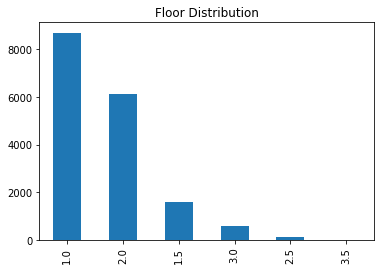

In [115]:
# Identifying how many floors can be found in most homes

housing['floors'].value_counts().plot.bar()
plt.title("Floor Distribution")
plt.show()

# From research it is possible to have a one-and-a-half storey house, or 1.5-storey house

> Most of the houses had 1 floor while the least having 2 and half storeys

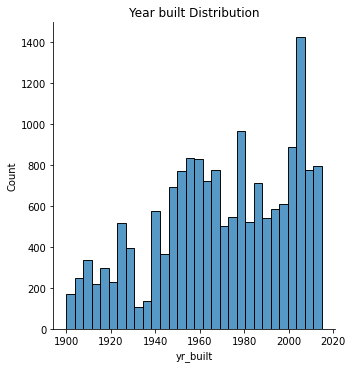

In [116]:
# Identifying which year most houses were built
# Plotting the grade distribution

sns.displot(housing['yr_built'],bins=30)
plt.title("Year built Distribution")
plt.show()

> Each bin has the size of 4 years therefore; 

> We can conclude that most of the houses were built between the years of 2004 and 2008

### Bivariate Analysis

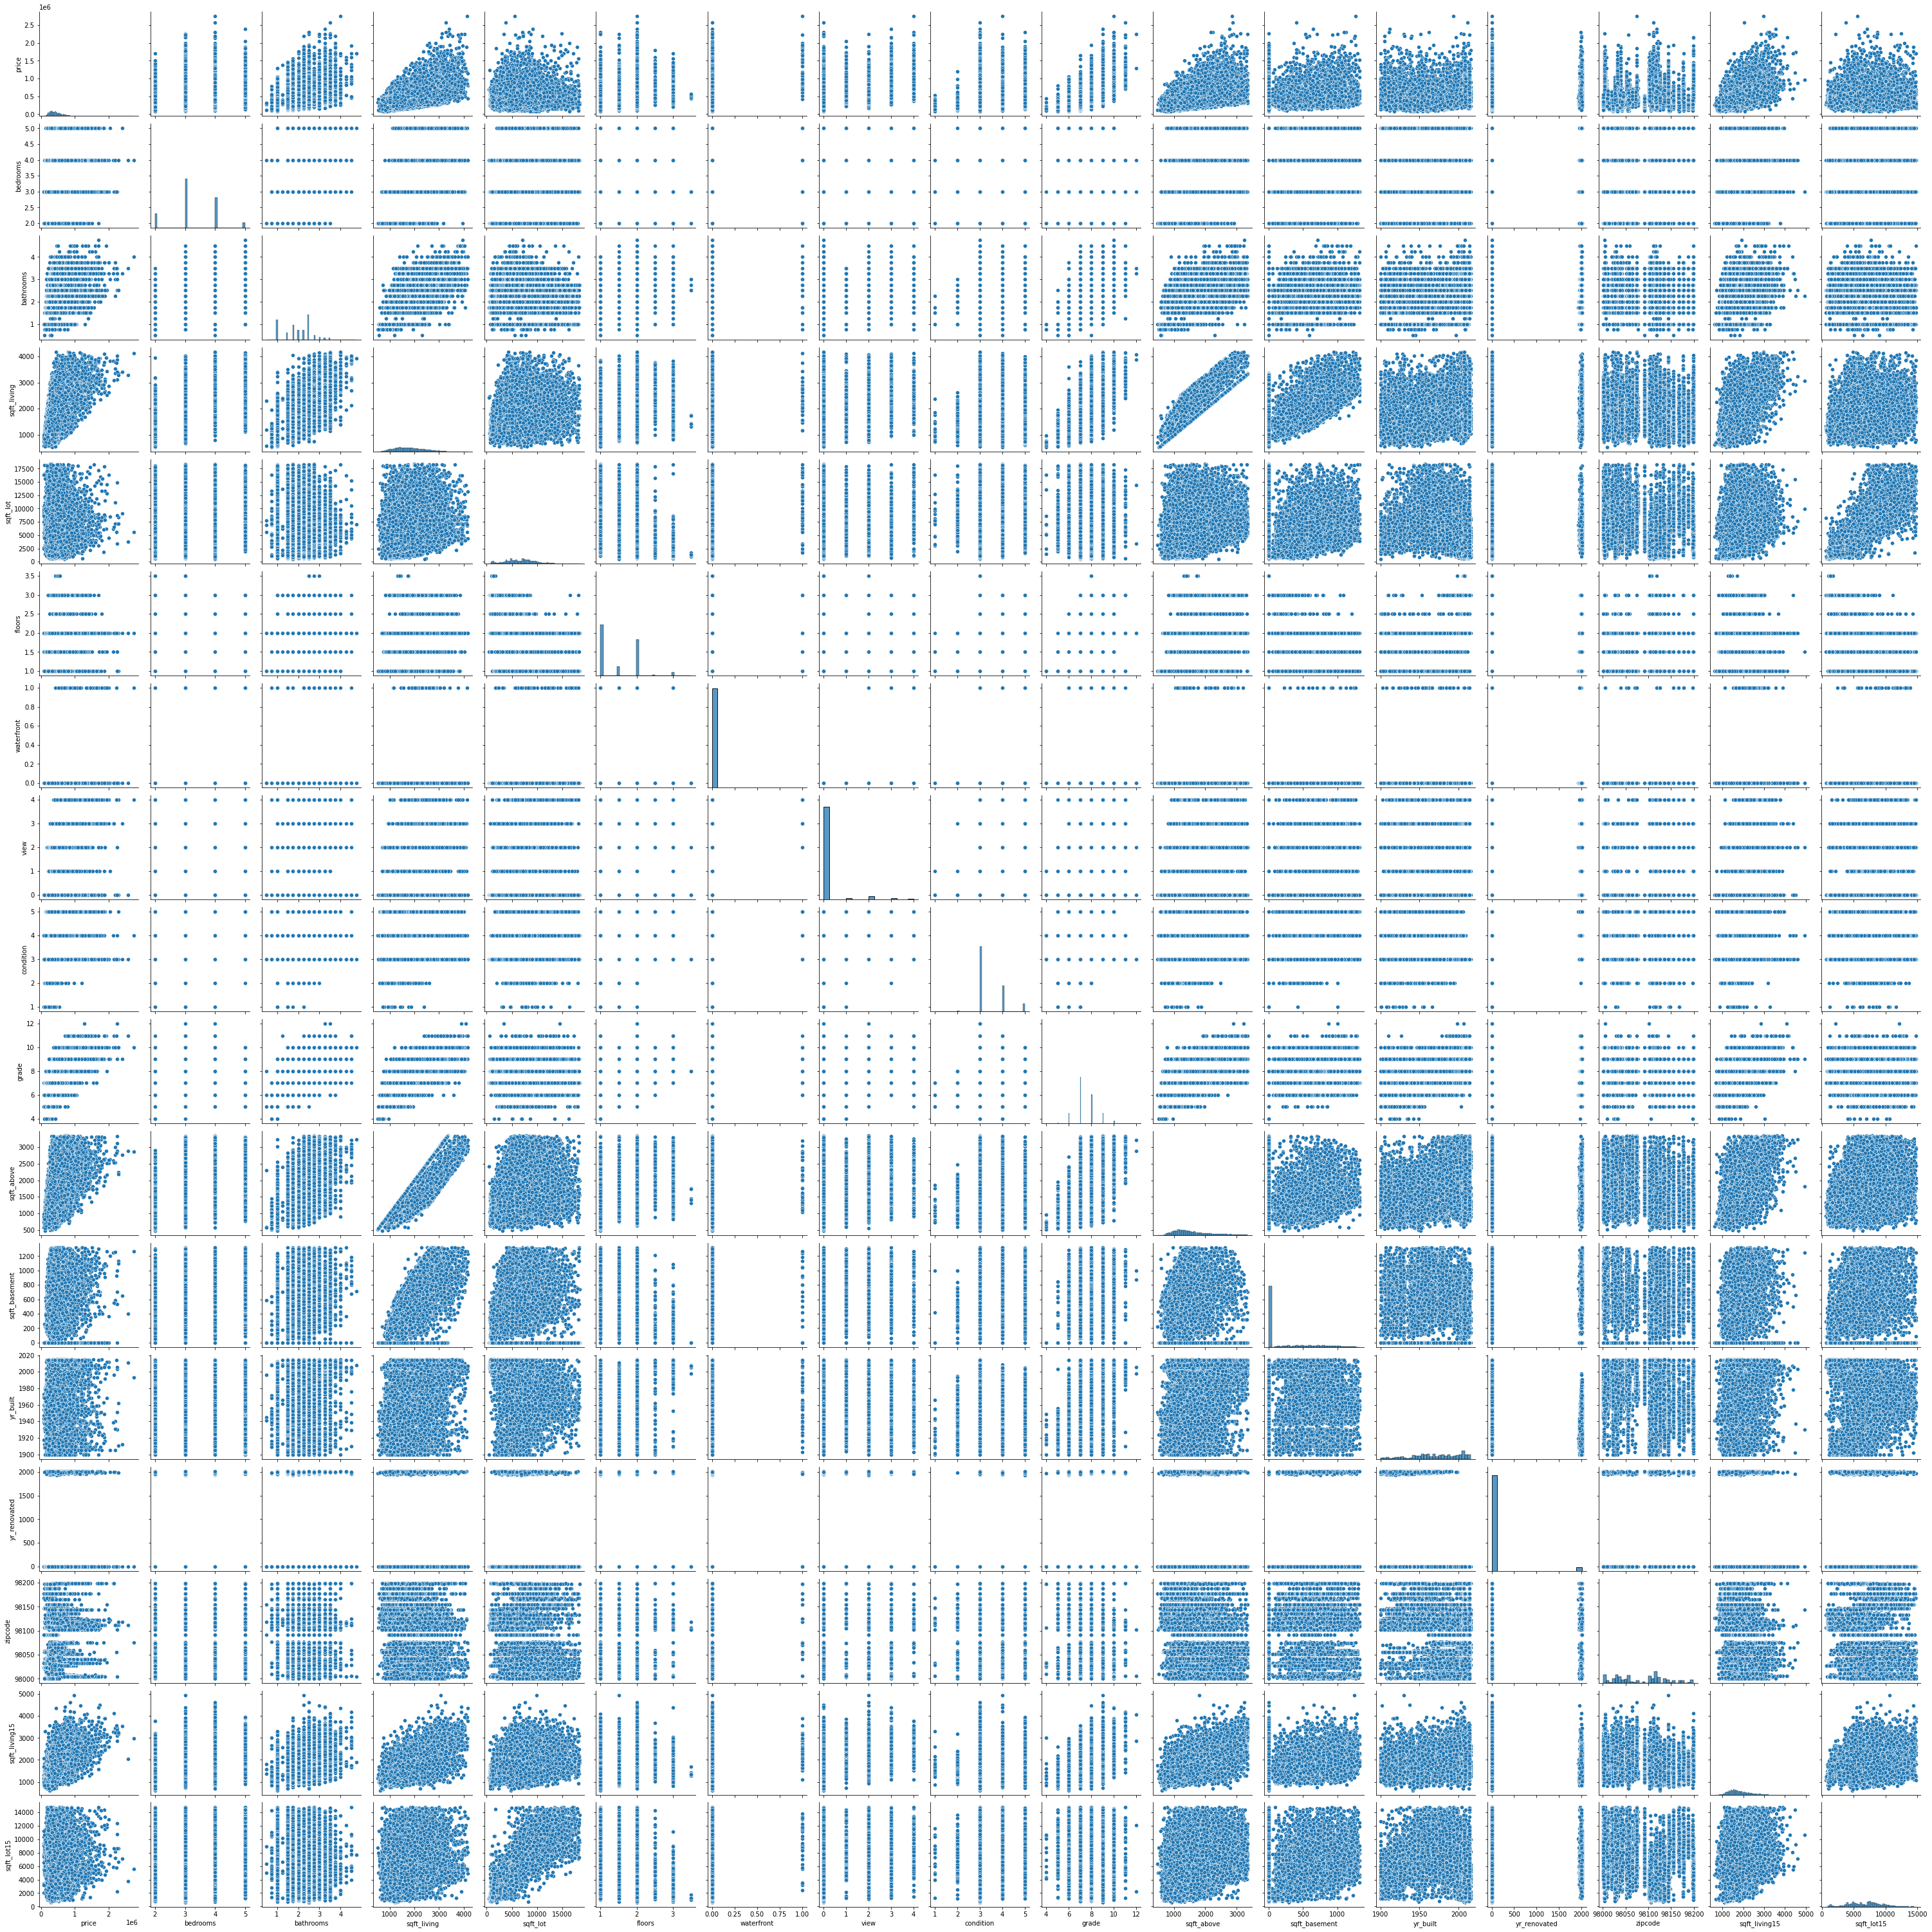

In [117]:
# Plotting pairplots

sns.pairplot(housing)

plt.show()

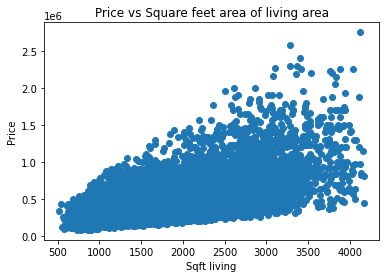

In [118]:
# Create a scatter plot between price and Square feet area of living area
# Plotting our scatterplot
plt.scatter(housing['sqft_living'], housing['price'])

# Giving our scatterplot a title
plt.title('Price vs Square feet area of living area')

# Labelling our x axis
plt.xlabel('Sqft living')

# Labelling our y axis
plt.ylabel('Price')

# Displaying our scatterplot
plt.show()

> The scatterplot graph shows that the variable price has a strong correlation to Square feet area of living area.

> This is because as the variable Sqft living increases the price also increases exhibiting a direct proportional relation.

In [119]:
# Using the correlation coefficient, determine whether price and 
# Square feet area of basement are strongly or weakly correlated.

# Calculating the pearson coefficient
pearson_coeff =  housing['price'].corr(housing['sqft_basement'], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = housing['price'].corr(housing['sqft_basement']) 
print(coeff)

0.26774314399769816
0.26774314399769816


> Correlation coefficients between .20 and .50 are generally considered to be moderate

> Our coeff of 0.26774314399769816 indicates a moderate correlation between the variables

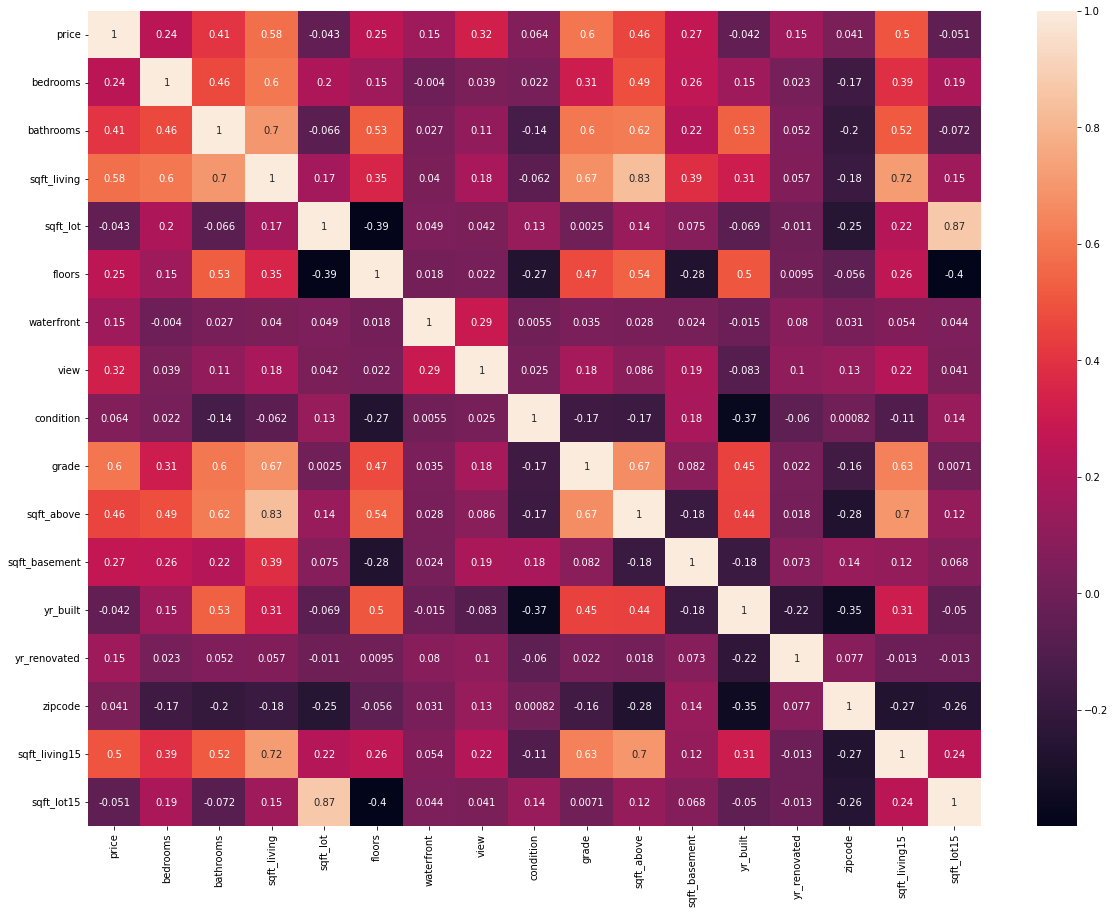

In [120]:
# Plotting a correlation matrix

plt.subplots(figsize=(20,15))
sns.heatmap(housing.corr(), annot=True)
plt.show()


> Sqft living has a high correlation of 0.83 with Sqft above, a positive correlation 

> Sqft lot also has a high correlation of 0.87 with Sqft lot15, a positive correlation as well

> Price and year built have a correlation of -0.042 which is a weak and negative correlation, indicating that as year increases the price is the houses go down

### Multivariate Analysis

> Linear Discriminant Analysis (LDA) is a simple and powerful linear transformation that is most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and also reduce computational costs.

> We decided to go with this because we had a known target variable which was dependent on other variables

In [121]:
# dividing our df into features and corresponding labels
feat = housing.drop(['price'], 1)
group_label= housing['price']

feat

bedrooms  bathrooms  sqft_living  ...  zipcode  sqft_living15  sqft_lot15
0             3       1.00         1180  ...    98178           1340        5650
1             3       2.25         2570  ...    98125           1690        7639
2             2       1.00          770  ...    98028           2720        8062
3             4       3.00         1960  ...    98136           1360        5000
4             3       2.00         1680  ...    98074           1800        7503
...         ...        ...          ...  ...      ...            ...         ...
21608         3       2.50         1530  ...    98103           1530        1509
21609         4       2.50         2310  ...    98146           1830        7200
21610         2       0.75         1020  ...    98144           1020        2007
21611         3       2.50         1600  ...    98027           1410        1287
21612         2       0.75         1020  ...    98144           1020        1357

[17074 rows x 16 columns]

In [122]:
# subject our features to LDA
# import LDA method from sklearn library

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# create an instance of lda
lda = LDA()

lda_ = lda.fit(feat, group_label)
lda_feat = lda_.transform(feat)

# Display the coefficient of the reduced columns
lda_.coef_

array([[-1.59914446e+00,  1.55877308e+00, -2.98171367e-03, ...,
         3.56819018e-02,  3.96287605e-03, -1.26825018e-03],
       [-1.49239656e+00,  1.50229329e+00, -5.17774306e-04, ...,
         2.04671527e-02, -3.80631816e-03,  6.32846902e-04],
       [ 1.18946517e+00, -9.20980404e-01, -2.21524641e-03, ...,
         2.72972253e-02, -2.32187610e-03,  1.29653486e-03],
       ...,
       [ 1.51590803e+00,  4.54313431e+00, -3.66848151e-05, ...,
        -1.62190125e-04,  7.28361168e-03, -8.65362337e-04],
       [-5.07584724e-01,  2.31765629e+00,  3.17876566e-03, ...,
         1.85856938e-02, -5.82893415e-03, -4.93112952e-04],
       [-2.51869388e+00,  3.55683063e+00,  6.77599913e-03, ...,
        -2.19242577e-02, -1.10007811e-03, -7.29135337e-04]])

In [123]:
# since coefficient are in an array, we need to create a df so that we can retrieve name of columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

0
floors         3.404120
bathrooms      1.558773
zipcode        0.035682
yr_built       0.006637
sqft_living15  0.003963
sqft_lot       0.002684
sqft_basement -0.000518
sqft_lot15    -0.001268
yr_renovated  -0.002049
sqft_above    -0.002653
sqft_living   -0.002982
view          -1.341061
bedrooms      -1.599144
grade         -6.652966
condition     -7.823170
waterfront    -9.224717

The positive values those are floors, bathrooms, zipcode, year built, Sqft living15 and Sqft lot can be used to predict the target variable which is price

## Regression Analysis

### Checking for multicollinearity

In [124]:
# Removing the serial and home_score columns, we want to focus on our independent variables only.
independent_only = housing.drop(columns=['price'])

# Let's display the correlations between the variables
correlations = independent_only.corr()

correlations


bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.000000   0.464409  ...       0.392021    0.189341
bathrooms      0.464409   1.000000  ...       0.516155   -0.072337
sqft_living    0.602611   0.700131  ...       0.721019    0.153913
sqft_lot       0.198023  -0.066219  ...       0.220333    0.872548
floors         0.151498   0.525071  ...       0.261798   -0.399738
waterfront    -0.004033   0.026918  ...       0.054135    0.044097
view           0.038662   0.113476  ...       0.219833    0.041116
condition      0.021973  -0.141217  ...      -0.108052    0.135738
grade          0.306256   0.603097  ...       0.631016    0.007070
sqft_above     0.485321   0.615688  ...       0.695695    0.123759
sqft_basement  0.263006   0.218816  ...       0.122172    0.067505
yr_built       0.151730   0.533500  ...       0.309802   -0.049936
yr_renovated   0.022931   0.052221  ...      -0.013294   -0.012626
zipcode       -0.165533  -0.202958  ...      -0.268788   -0.258562
sqft_living15  0.392021   0.516155  ...       1.000000    0.240971
sqft_lot15     0.189341  -0.072337  ...       0.240971    1.000000

[16 rows x 16 columns]

> The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself

In [125]:
#Creating VIF for each independent variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  ...  sqft_living15  sqft_lot15
bedrooms       1.699430  -0.355770  ...       0.110525   -0.134424
bathrooms     -0.355770   3.042905  ...      -0.083614    0.174788
sqft_living    0.468279  -1.151134  ...      -1.623400   -1.739907
sqft_lot      -0.066186   0.065105  ...       0.154441   -3.538045
floors         0.002722  -0.654678  ...       0.223010    0.593366
waterfront     0.020439   0.003355  ...       0.006696   -0.017443
view           0.097136  -0.059056  ...      -0.284003   -0.016652
condition     -0.027498  -0.173844  ...       0.137439   -0.146103
grade          0.266471  -0.209623  ...      -0.629400    0.000744
sqft_above    -1.433764   0.144716  ...      -0.003289    1.639051
sqft_basement -0.837525  -0.401840  ...       0.424505    1.122501
yr_built       0.123370  -0.987354  ...       0.097470   -0.285710
yr_renovated   0.041568  -0.275955  ...       0.146503   -0.086171
zipcode        0.059313   0.095557  ...       0.258830    0.084347
sqft_living15  0.110525  -0.083614  ...       2.644322   -0.417362
sqft_lot15    -0.134424   0.174788  ...      -0.417362    4.479881

[16 rows x 16 columns]

> The VIF score for each variable is found alongside the downwards sloping diagonal. 

> sqft_lot15 has a value nearing 5, let's see how the VIF scores improve if we remove it from our dataset

In [126]:
# Removing home_team_rank becuase it is the one with the highest VIF 
revised = independent_only.drop(columns=['sqft_lot15'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

bedrooms  bathrooms  ...   zipcode  sqft_living15
bedrooms       1.695396  -0.350525  ...  0.061844       0.098002
bathrooms     -0.350525   3.036085  ...  0.092266      -0.067330
sqft_living    0.416072  -1.083249  ...  0.050167      -1.785496
sqft_lot      -0.172349   0.203146  ...  0.246450      -0.175177
floors         0.020527  -0.677829  ... -0.178246       0.278290
waterfront     0.019915   0.004035  ... -0.011006       0.005071
view           0.096637  -0.058406  ... -0.158507      -0.285554
condition     -0.031882  -0.168144  ...  0.180130       0.123828
grade          0.266493  -0.209652  ... -0.109377      -0.629331
sqft_above    -1.384582   0.080766  ... -0.024174       0.149411
sqft_basement -0.803843  -0.445636  ... -0.250663       0.529081
yr_built       0.114796  -0.976207  ...  0.505642       0.070852
yr_renovated   0.038982  -0.272593  ...  0.054827       0.138475
zipcode        0.061844   0.092266  ...  1.365087       0.266688
sqft_living15  0.098002  -0.067330  ...  0.266688       2.605439

[15 rows x 15 columns]

All scores dropped, but the sqft_lot's in particular did drop by a lot, indicating that sqft_lot and sqft_lot15 were colinear

### Residual plots and heteroskedasticity testing

In [127]:
# Let's start by creating a model based on our revised set of independent variables above, 
# then displaying the residual plot for it.

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X2 = revised.values
y2 = housing['price'].values

X2_train, X2_test, price_train, price_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X2_train, price_train)

# This is our prediction for admission based on our model
price_predict = regressor.predict(X2_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, price_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-1714.0514438675177

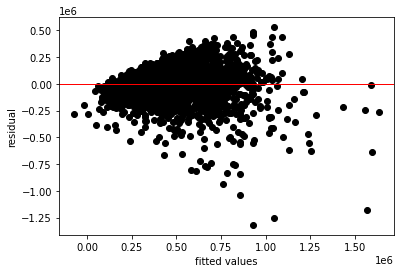

In [128]:
# Let's show the residual plot

import matplotlib.pyplot as plt

plt.scatter(price_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [129]:
# Testing using the bartlett's test.
import scipy as sp

test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(price_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')



inf
the variances are homogeneous!


> Since the variances are homogeneous, we conclude that there is no heteroscedasticity.

### Quantile Regression

In [226]:
housing.head()

price  bedrooms  bathrooms  ...  zipcode  sqft_living15  sqft_lot15
0  221900.0         3       1.00  ...    98178           1340        5650
1  538000.0         3       2.25  ...    98125           1690        7639
2  180000.0         2       1.00  ...    98028           2720        8062
3  604000.0         4       3.00  ...    98136           1360        5000
4  510000.0         3       2.00  ...    98074           1800        7503

[5 rows x 17 columns]

In [237]:
# Picking out the columns we'll use for the quantile regression
x_quat = housing['floors']
y_quat = housing['price']

In [238]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ floors', housing)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.02613
Model:                       QuantReg   Bandwidth:                   3.859e+04
Method:                 Least Squares   Sparsity:                    5.276e+05
Date:                Sat, 12 Feb 2022   No. Observations:                17074
Time:                        11:31:48   Df Residuals:                    17072
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.99e+05   5831.259     51.275      0.000    2.88e+05     3.1e+05
floors        8.6e+04   3692.080     23.293      0.000    7.88e+04    9.32e+04


In [239]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['floors']] + res.conf_int().loc['floors'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_quat_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt      intercept    x_quat_coef  cf_lower_bound  cf_upper_bound
0  0.1  151500.000001   64500.000000    60426.410429    68573.589570
1  0.2  184999.999994   70000.000003    65596.344634    74403.655372
2  0.3  218050.000010   74566.666663    68931.741145    80201.592182
3  0.4  254000.000009   81999.999997    75476.997307    88523.002687
4  0.5  299000.000000   86000.000000    78763.143782    93236.856219
5  0.6  326095.000002  104634.999999    97327.256093   111942.743906
6  0.7  359999.999999  125000.000001   116446.100631   133553.899370
7  0.8  392999.999986  159500.000007   150107.044978   168892.955036
8  0.9  465000.000003  194999.999997   181626.524958   208373.475036


In [240]:
# Making Predictions
# 
pred = res.predict(x_quat)
# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y, 'Predicted': pred})
df

Actual     Predicted
0      221900.0  6.600000e+05
1      538000.0  8.550000e+05
2      180000.0  6.600000e+05
3      604000.0  6.600000e+05
4      510000.0  6.600000e+05
...         ...           ...
21608  360000.0  1.050000e+06
21609  400000.0  8.550000e+05
21610  402101.0  8.550000e+05
21611  400000.0  8.550000e+05
21612  325000.0  8.550000e+05

[17074 rows x 2 columns]

### Lasso Regression

In [253]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#

X_1 = housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15']]
y_1 = housing['price']

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X_1)
X_1 = scaler.transform(X_1)

In [254]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X_1, y_1) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X_1, y_1)) 
print("lasso MSE:", mean_squared_error(y_1, lasso.predict(X_1))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5966695374434254
lasso MSE: 23610945818.7433
lasso coef: [-18336.25944064  17800.08464455 136631.26631473 -27505.28439334
  13862.99661655  19112.56274565  23803.2297932   15216.21552053
 111243.09862672 -69997.73783514 -32661.99834844 -92091.23072924
   5306.7281081    4125.74515307  30882.90590899]


In [255]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_1_train, y_1_train) 
linear.fit(X_1_train, y_1_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_1_test, y_1_test))
print("linear score:", linear.score(X_1_test, y_1_test)) 
print("lasso MSE:", mean_squared_error(y_1_test, gridlasso.predict(X_1_test)))
print("linear MSE:", mean_squared_error(y_1_test, linear.predict(X_1_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.5818345522351589
linear score: 0.5818345994968199
lasso MSE: 24783922421.86807
linear MSE: 24783919620.753468
lasso best estimator coef: [-18640.63242305  16690.95755634 140732.2641963  -28199.65573374
  14016.7322554   17233.75047416  23518.38026949  14528.12145303
 109482.35880119 -71323.3839567  -33029.18358984 -92897.02622115
   6970.3647551    3391.42573964  31170.54545643]
linear coef: [-18640.67984954  16691.49506697  37652.17626813 -28199.78259684
  14016.66251265  17233.83419254  23518.36337913  14528.26379899
 109482.23043734  25364.3721991   24734.31760015 -92897.21187967
   6970.43920027   3391.5464389   31171.0481745 ]


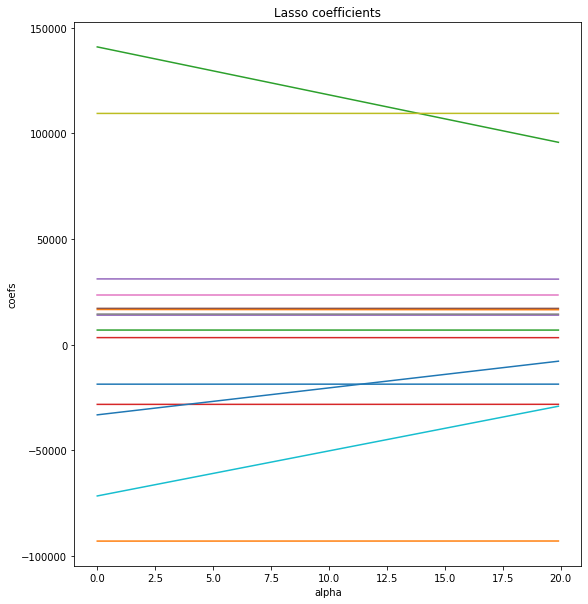

In [140]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_1_train, y_1_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (20,10))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

> We can see that the constraints on the parameters have shrunk the coefficients towards 0

> Though none have been shrunk all the way to zero because most of the variables are useful making Ridge Regression a better option 

In [257]:
# For predictions
model = Lasso(alpha=0.1)
model.fit(X_1_train, y_1_train)

y_pred = model.predict(X_1_test)

# Printing out the prediction df
df1 = pd.DataFrame({'Actual': y_1_test, 'Predicted': y_pred})
df1

Actual      Predicted
6248    334000.0  523961.346579
19821   480000.0  392248.931184
1779    355000.0  418227.205873
7683    600000.0  578418.503517
18628  1600000.0  849322.231260
...          ...            ...
4660    886000.0  915133.732197
21516   440000.0  410990.607150
2418    280000.0  339804.825857
2639    395000.0  443976.401040
19163   434000.0  524585.815819

[4269 rows x 2 columns]

### Ridge Regression

In [146]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [147]:
# installing !pip install pydataset and importing pydataset so as to use a dataset from the package
# 
!pip install pydataset
from pydataset import data 

In [267]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 

X1 =  housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15']].values
y1 = housing['price'].values

X1_train, X1_test, y1_train,y1_test = train_test_split(X1,y1, test_size=0.2,random_state=0)

regression = LinearRegression()
regression.fit(X1,y1)
first_model = (mean_squared_error(y_true=y1,y_pred=regression.predict(X1)))
print(first_model)

# The output  value of 2361.094 will be our indicator to determine if the regularized ridge regression model is superior or not.

23610945790.92936


In [260]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [261]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X1,y1)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha to which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 23818902851.889256 is worse than what the baseline model was. 

23818902851.889256

In [262]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#

ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X1,y1)
second_model = (mean_squared_error(y_true=y1,y_pred=ridge.predict(X1)))
print(second_model)


23615543365.13027


> The 2361.55 is lower than the 2381.89. This is because the last results are not cross-validated.

> In addition, these results indicate that there is little difference between the ridge and baseline models.

In [263]:
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,housing.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': 71.79943210441888,
 'bedrooms': 26201.388550079297,
 'condition': 117541.92013892496,
 'floors': 400376.64893808996,
 'grade': 23.362016081333422,
 'price': -23545.58228917522,
 'sqft_above': 48.43741610387042,
 'sqft_basement': -3047.994206270122,
 'sqft_living': -8.482091797231988,
 'sqft_lot': 25352.016996092734,
 'view': 23351.87246318539,
 'waterfront': 39194.008939099425,
 'yr_built': 13.944780075958022,
 'yr_renovated': 76.53673045543383,
 'zipcode': 56.70673818270916}

In [268]:
# For predictions
model = Ridge(alpha=0.01)
model.fit(X1_train, y1_train)

y_pred = model.predict(X1_test)

# Printing out the prediction df
df1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred})
df1

Actual      Predicted
0     796000.0  764655.783857
1     640000.0  543589.574449
2     330000.0  321671.013523
3     667000.0  707286.131829
4     305000.0  311518.115957
...        ...            ...
3410  280000.0  465230.606844
3411  225000.0  443774.189034
3412  239000.0  325549.150376
3413  289000.0  390017.088989
3414  374950.0  446492.370280

[3415 rows x 2 columns]

### Cross Validating

In [153]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



# We will use 4 independent variables for this
Xa =  housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15']].values
yb = housing['price'].values


# Train using 80% of the data.
Xa_train, Xa_test, yb_train, yb_test = train_test_split(Xa, yb, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(Xa,yb)

# assess the accuraccy of the model
y_pred = regressor.predict(Xa_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(yb_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yb_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yb_test, y_pred)))

Mean Absolute Error: 111000.47869932589
Mean Squared Error: 23962782605.496624
Root Mean Squared Error: 154799.1686201726


In [158]:
# Let's now cross validate our model by using k-fold cross validation. We will use 5 folds

from sklearn.model_selection import KFold

# We will use the same 4 independent variables for this
Xa =  housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15']].values
yb = housing['price'].values


folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(Xa)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(Xa):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  Xa_train, Xa_test = Xa[train_index], Xa[test_index]
  yb_train, yb_test = yb[train_index], yb[test_index]
  
  # fit a model accordingly
  #regressor = LinearRegression()  
  #regressor.fit(X_train, y_train)
  
  lasso = linear_model.Lasso()
  lasso.fit(Xa_train, yb_train)

  # assess the accuraccy of the model
  y_pred = regressor.predict(Xa_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(yb_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 152575.29041594072

Training model 2
Model 2 Root Mean Squared Error: 156088.06402165763

Training model 3
Model 3 Root Mean Squared Error: 152869.37629446216

Training model 4
Model 4 Root Mean Squared Error: 153863.7712803034

Training model 5
Model 5 Root Mean Squared Error: 153147.36035696638


## Challenging the solution

> To challenge our solutions we use the Elastic Net Regression because it groups and shrinks the parameters associated with the correlated variables and leaves the important/useful variables 

### Elastic Net Regression

In [269]:
# Creating our linear regression model for the purpose of comparison
# 

# We will use 4 independent variables for this
X3 =  housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15']]
y3 = housing['price']

X3_train, X3_test, y3_train,y3_test = train_test_split(X3,y3, test_size=0.2,random_state=0)

regression=LinearRegression()
regression.fit(X3,y3)
first_model=(mean_squared_error(y_true=y3,y_pred=regression.predict(X3)))
print(first_model) 

# This mean standard error score of 1.05 is our benchmark for determining 
# if the elastic net model will be better or worst. 

23610945790.92936


In [270]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_, X3.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 26201.388550079297,
 'bedrooms': -23545.58228917522,
 'condition': 23351.87246318539,
 'floors': 25352.016996092734,
 'grade': 117541.92013892496,
 'sqft_above': 23.362016081333422,
 'sqft_basement': 48.43741610387042,
 'sqft_living': 71.79943210441888,
 'sqft_living15': 56.70673818270916,
 'sqft_lot': -8.482091797231988,
 'view': 39194.008939099425,
 'waterfront': 400376.64893808996,
 'yr_built': -3047.994206270122,
 'yr_renovated': 13.944780075958022,
 'zipcode': 76.53673045543383}

In [271]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [272]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X3,y3)
search.best_params_
abs(search.best_score_)

23844573892.88

In [175]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 2384.457. This is above our baseline model of MSE 1.05  for the baseline model. 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=1.0)
elastic.fit(X3,y3)
second_model=(mean_squared_error(y_true=y3,y_pred=elastic.predict(X3)))
print(second_model)

23610945791.404243


> Our results are very similar to the baseline model

In [176]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X3.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 26200.35896483902,
 'bedrooms': -23545.49973637902,
 'condition': 23351.58438324454,
 'floors': 25352.191889148406,
 'grade': 117542.08915746938,
 'sqft_above': -117.57487416219094,
 'sqft_basement': -92.49902899208604,
 'sqft_living': 212.73747227050671,
 'sqft_living15': 56.70553247319694,
 'sqft_lot': -8.482039841638633,
 'view': 39194.05007755869,
 'waterfront': 400374.49131853314,
 'yr_built': -3047.98618054768,
 'yr_renovated': 13.944512984711682,
 'zipcode': 76.5338195614091}

> No column was completely removed, indicating that all the values were good to the alogrithm.

In [273]:
# For predictions
model = ElasticNet(alpha=0.001,l1_ratio=1.0)
model.fit(X3_train, y3_train)

y_pred = model.predict(X3_test)

# Printing out the prediction df
df3 = pd.DataFrame({'Actual': y3_test, 'Predicted': y_pred})
df3

Actual      Predicted
5962   796000.0  764655.856382
3132   640000.0  543589.905646
19491  330000.0  321671.015967
7039   667000.0  707286.865092
190    305000.0  311518.051423
...         ...            ...
4097   280000.0  465230.614334
4440   225000.0  443774.510611
16715  239000.0  325548.669847
14027  289000.0  390016.872176
9756   374950.0  446492.096229

[3415 rows x 2 columns]

> To answer our Specific Question, the factors that affect house pricing are floors, bathrooms, zipcode, year built, Sqft living15 and Sqft lot

## 9. Follow up questions

### a). Did we have the right data?

Yes we did

### b). Do we need other data to answer our question?

No our data was sufficient to perform our analysis

### c). Did we have the right question?

Yes we did